# [ICTCOG] 4기 경북대 기본반

## 기계학습 (5)
- [ML crash course]:https://developers.google.com/machine-learning/crash-course/ml-intro?hl=en


- 기계학습 전반적 순서 익히는게 중요

In [3]:
import seaborn as sns

In [4]:
mpg=sns.load_dataset('mpg')

- object 문자 :origin, name
- 결측치: horsepower 6개 

In [5]:
mpg.info() #문자, 결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- tidy data 
    - head, tail, sample 

In [6]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [8]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<AxesSubplot:>

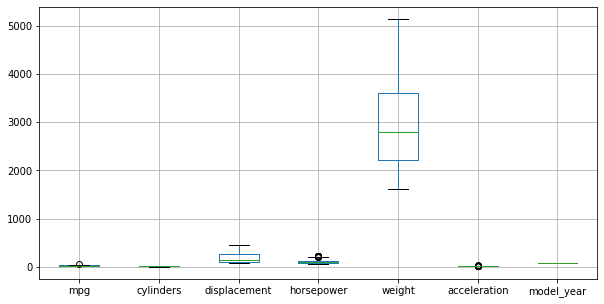

In [10]:
mpg.boxplot(figsize=(10,5)) #weight feature 스케일 차이 큼

<AxesSubplot:>

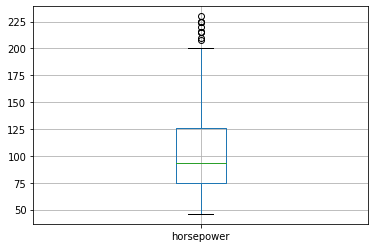

In [11]:
mpg[['horsepower']].boxplot() #결측치 확인 불가

### missingno
- 데이터프레임의 결측치 시각화

In [ ]:
!pip install missingno 

In [12]:
import missingno

In [13]:
dir(missingno)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<AxesSubplot:>

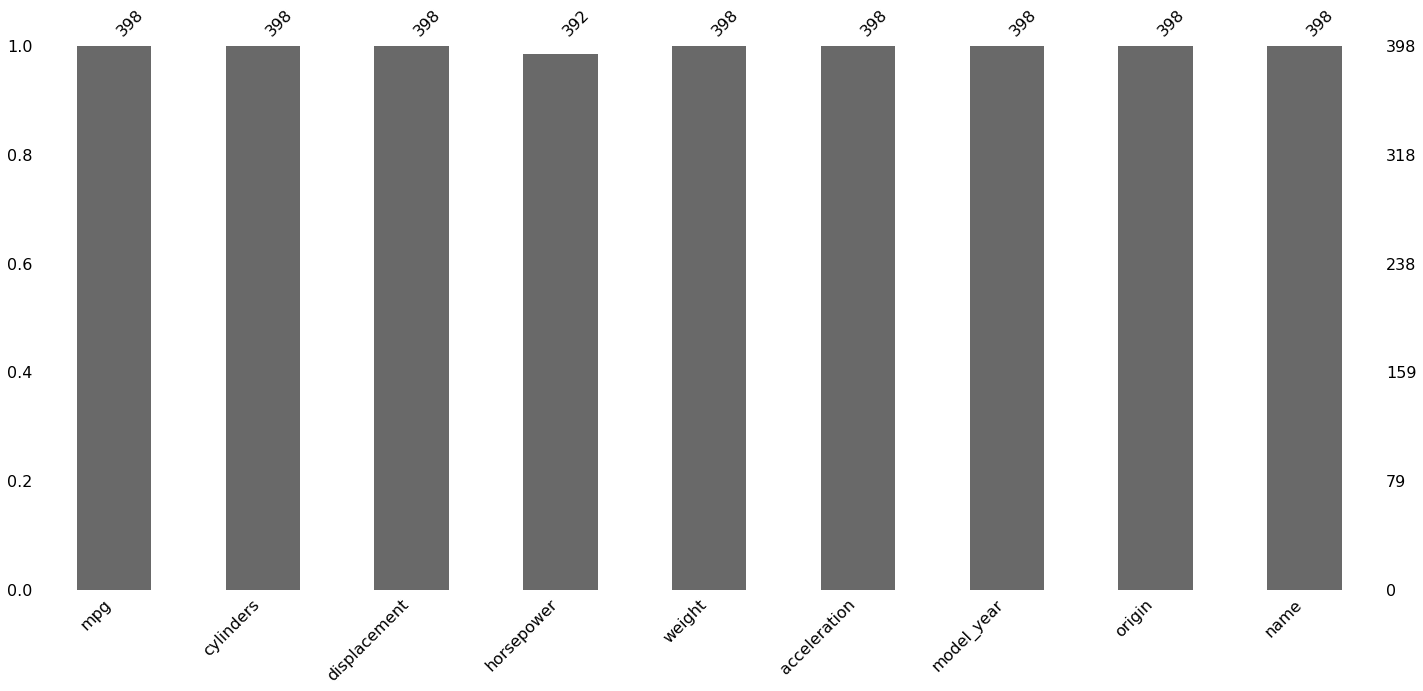

In [14]:
missingno.bar(mpg)  #큰 차이가 안 보임

<AxesSubplot:>

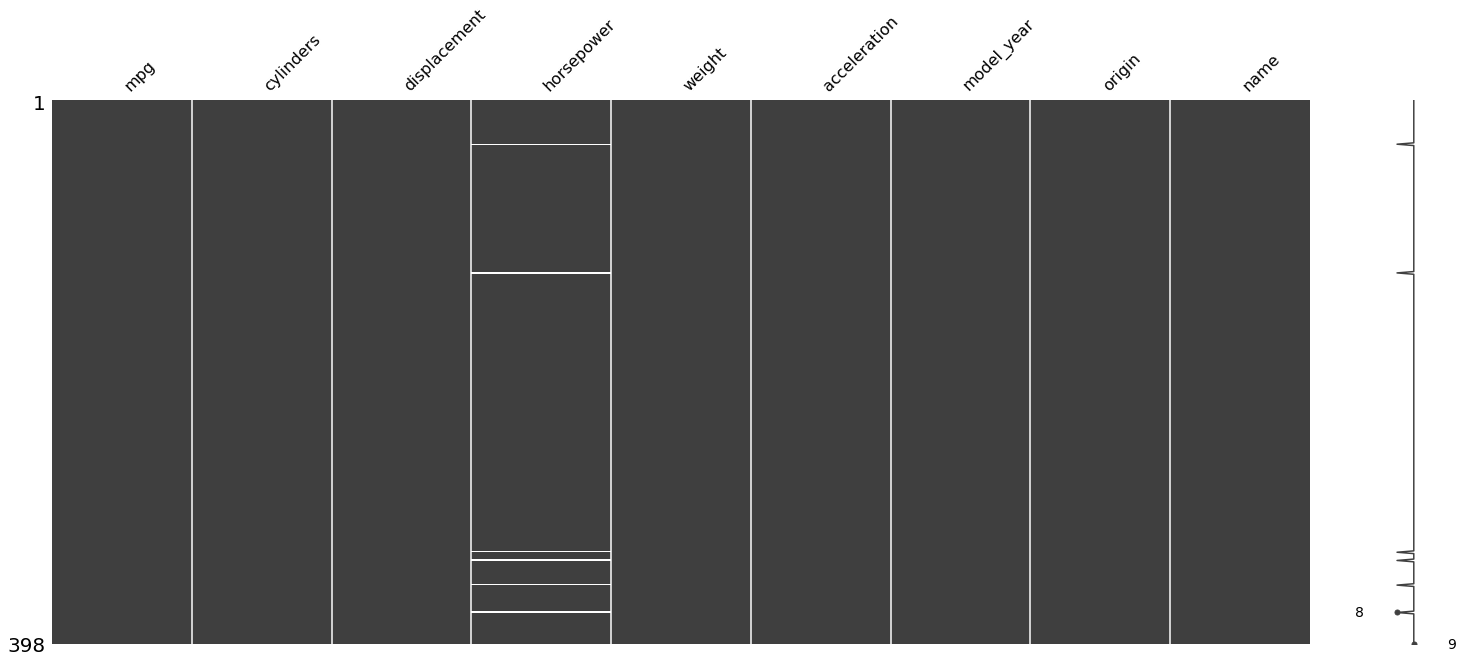

In [15]:
missingno.matrix(mpg) #몇번째 데이터가 결측치인지 몇개인지 선으로 보여줌

<AxesSubplot:>

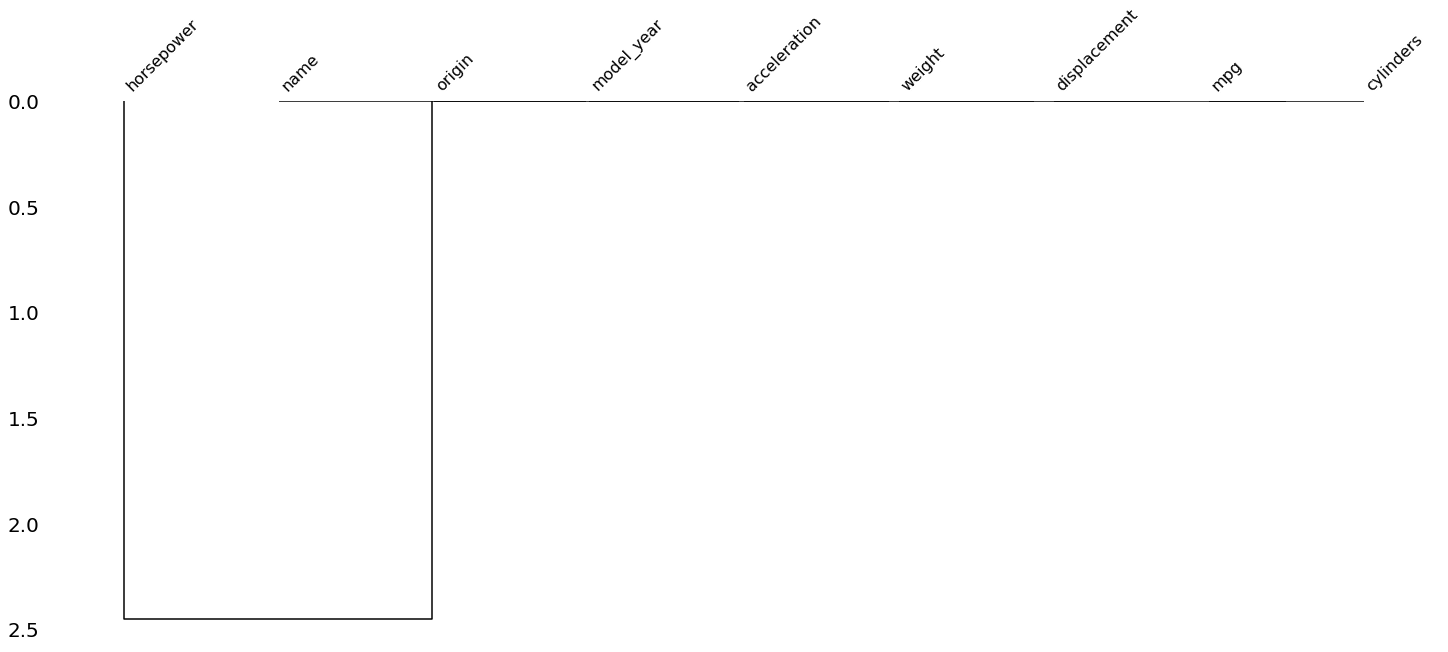

In [16]:
missingno.dendrogram(mpg)

<AxesSubplot:>

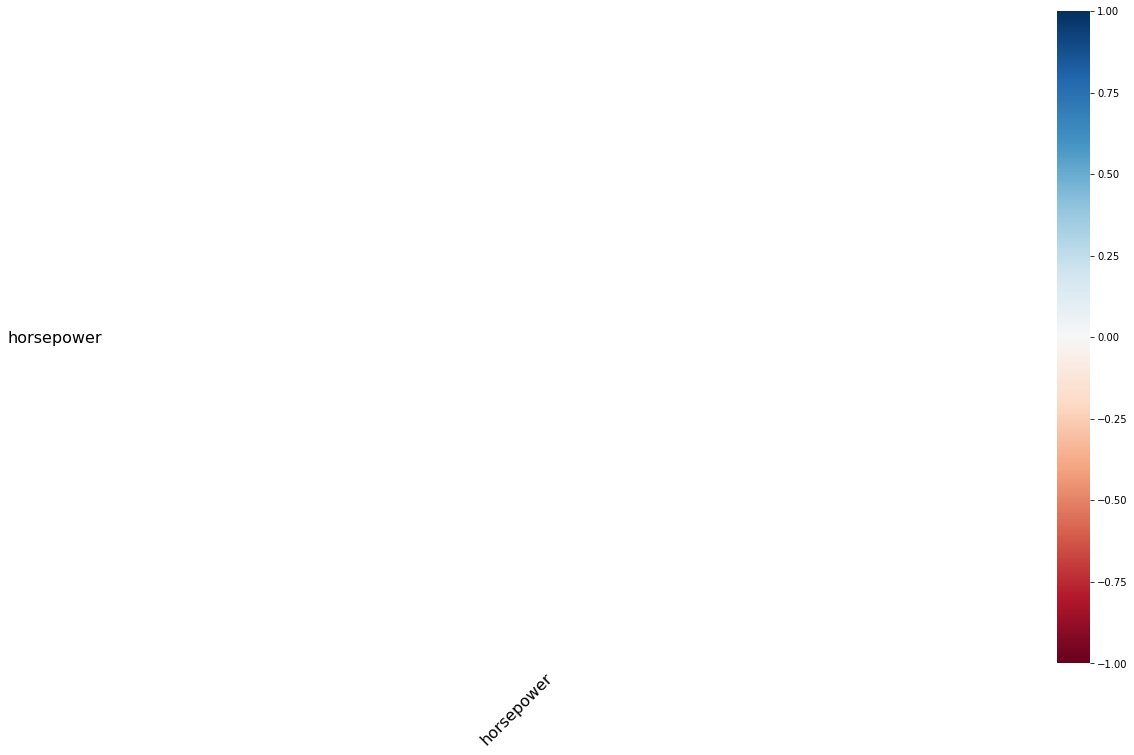

In [17]:
missingno.heatmap(mpg) #색상으로 정도를 보여줌

In [31]:
mpg.horsepower.isna()
mpg.horsepower.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [32]:
mpg[mpg.horsepower.isnull()]  #결측치 6개

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


### correlation
- 변수간의 상관관계 파악
    - + 양의 상관관계
    - - 음의 상관관계
    - 0 상관관계 없음

In [37]:
mpg.corr(method='kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.686477,-0.679847,-0.679166,-0.694006,0.301096,0.413661
cylinders,-0.686477,1.000000,0.794854,0.686146,0.735481,-0.367194,-0.273742
displacement,-0.679847,0.794854,1.000000,0.718471,0.800508,-0.352110,-0.218920
horsepower,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831
weight,-0.694006,0.735481,0.800508,0.703730,1.000000,-0.268619,-0.196863
acceleration,0.301096,-0.367194,-0.352110,-0.488239,-0.268619,1.000000,0.196024
model_year,0.413661,-0.273742,-0.218920,-0.277831,-0.196863,0.196024,1.000000


<AxesSubplot:>

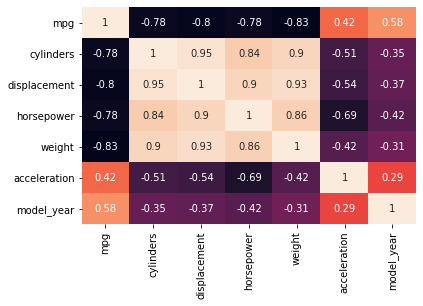

In [40]:
sns.heatmap(mpg.corr(method='pearson'),annot=True, cbar=False) #기본값 피어슨

<AxesSubplot:>

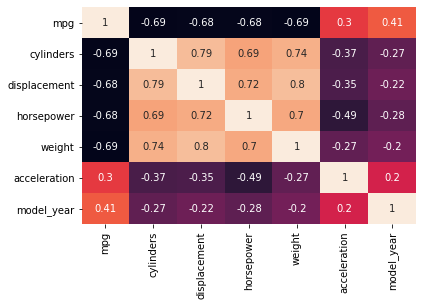

In [41]:
sns.heatmap(mpg.corr(method='kendall'),annot=True, cbar=False)

### regression
- mpg 연비 regression 맞취

> - 기계학습 
    -  Supervised 지도학습
        - Regression :값(실수) 예측
        - Classification: class 예측
    - Unsupervised 비지도학습
    - Reinformcement 강화학습

In [42]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Regression은 값을 예측하므로 경향을 봐야함
- 경향이 뚜렷함

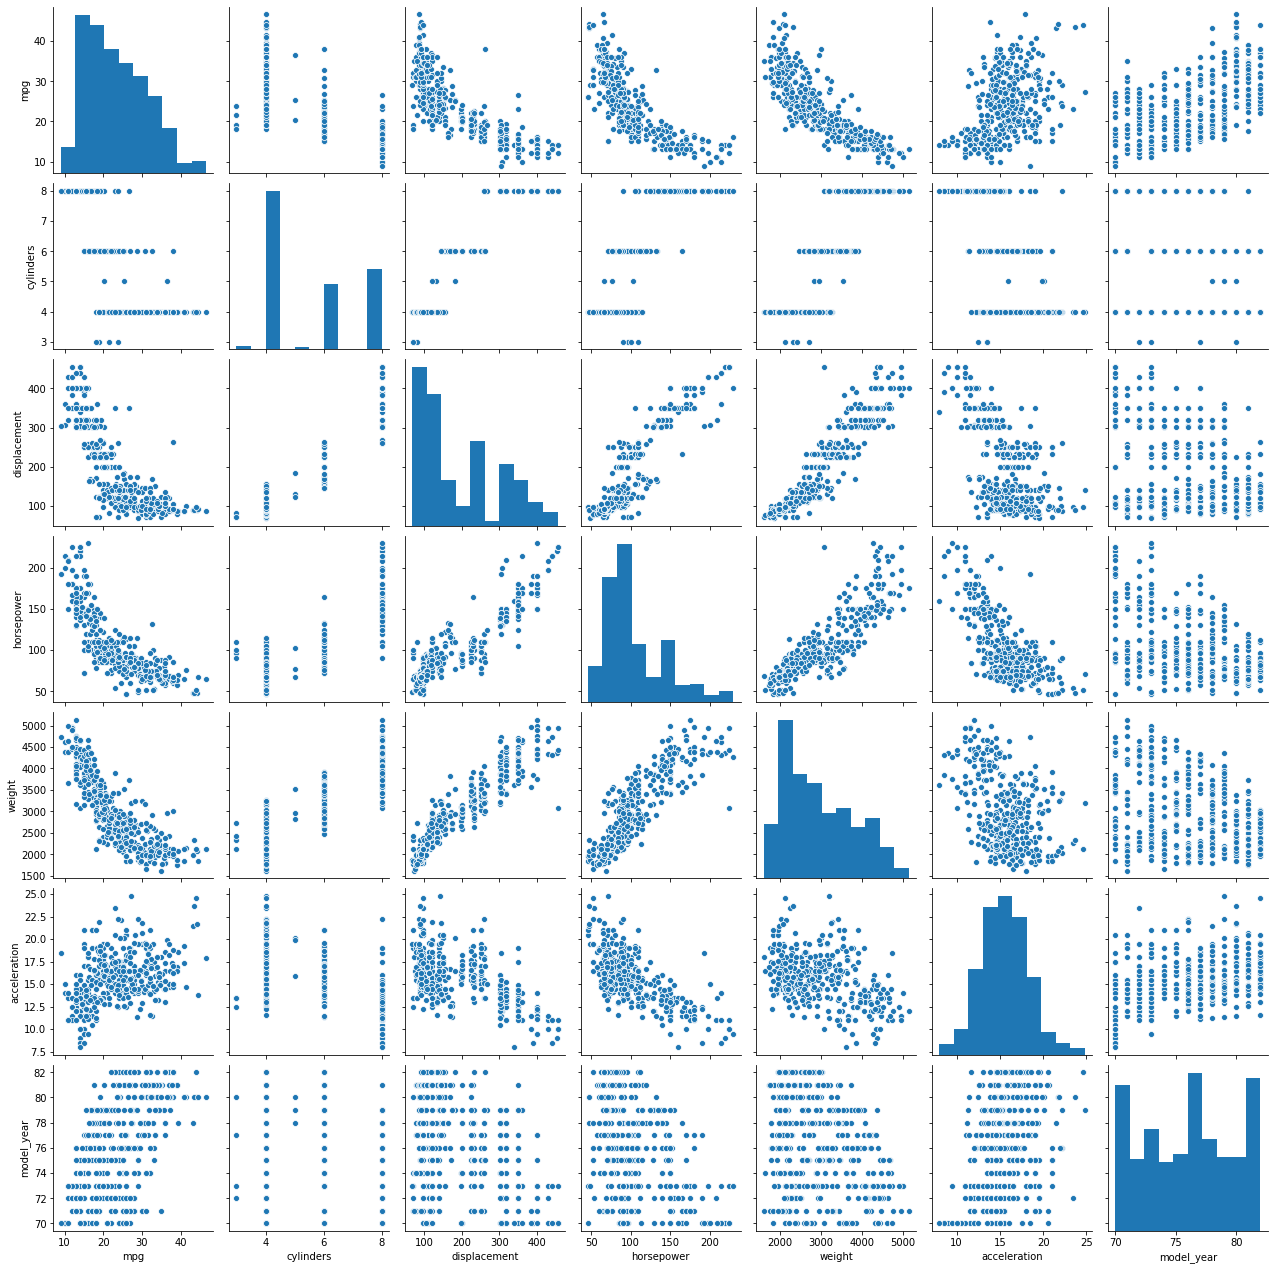

In [43]:
sns.pairplot(mpg)

### 기계학습을 위한 필수 조건 

1. 모든 데이터는 수치형
    - encoding
2. 결츨치가 없어야 한다
    - 결측치 처리

In [44]:
mpg.select_dtypes('object')

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
...,...,...
393,usa,ford mustang gl
394,europe,vw pickup
395,usa,dodge rampage
396,usa,ford ranger


value_counts
- series 

In [46]:
mpg.origin.value_counts() #series

usa       249
japan      79
europe     70
Name: origin, dtype: int64

- 이름은 예측에 큰 도움이 안 됨

In [47]:
mpg.name.value_counts() 

ford pinto            6
amc matador           5
toyota corolla        5
ford maverick         5
toyota corona         4
                     ..
mazda rx-7 gs         1
volkswagen type 3     1
ford mustang cobra    1
fiat x1.9             1
datsun 510            1
Name: name, Length: 305, dtype: int64

In [51]:
mpg2=mpg.iloc[:,:-1]
mpg2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


구조 바꾸기 전에 `copy`

In [53]:
mpg_raw=mpg.copy()  

mpg.drop('name',axis=1,inplace=True)

In [54]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [55]:
mpg_raw

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### encoding
- 문자를 숫자로 바꾸는 것

1. label encoding
    - 임의의 숫자로 교체
    - target에 적합
2. one-hot encoding
    - features , target 모두 적합

In [56]:
mpg.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

1. label encoding

    - usa :0
    - japan:1
    - europe:2
        - 학습할때 영향을 받음 

In [57]:
mpg.origin.map({'usa':0,'japan':1,'europe':2})

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    2
395    0
396    0
397    0
Name: origin, Length: 398, dtype: int64

In [67]:
iris=sns.load_dataset('iris')

In [68]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

- spelling 조심
- iris에서는 target이므로 label encoding해도 class

In [69]:
iris_raw =iris.copy()
iris.species=iris.species.map({'versicolor':0,'virginica':1,'setosa':2})

In [70]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


2. one-hot encoding
- dummy variable 이라고도 불림
- 갯수 만큼의 벡터에 1 하나로 구분

    - usa    [0,0,1]
    - europe [1,0,0]
    - japan  [0,1,0]

In [71]:
import pandas as pd

In [81]:
mpg_raw2=mpg.copy()
dum=pd.get_dummies(mpg.origin)
dum

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [84]:
mpg2=pd.concat([mpg,dum],axis=1).drop(columns='origin')
mpg2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [75]:
pd.get_dummies(iris_raw.species)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [85]:
mpg_raw

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


### LabelEncoder
- inverse_transform 기능 제공

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
lr=LabelEncoder()

### 1차원화 
> - [Ravel :Bolero](https://www.youtube.com/watch?v=mhhkGyJ092E)
    - ravel - copy , flatten - view

문자열은 1차원 기본

In [91]:
lr.fit_transform(mpg[['origin']])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,

In [92]:
lr.fit_transform(mpg.origin) #1차

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,

- 자동으로 바꾸어주고 원래의 값이 무엇인지 알려줌 

In [93]:
lr.inverse_transform([0,1,2]) 

array(['europe', 'japan', 'usa'], dtype=object)

In [107]:
le=LabelEncoder()

In [108]:
le.fit_transform(iris_raw.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
le.inverse_transform([0,1,2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### OneHotEncoder
- inverse_transform 기능 제공

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
ohe=OneHotEncoder()

In [98]:
ohe.fit_transform(mpg[['origin']]) #sparse matrix 

<398x3 sparse matrix of type '<class 'numpy.float64'>'
	with 398 stored elements in Compressed Sparse Row format>

In [97]:
ohe.fit_transform(mpg[['origin']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [99]:
ohe.fit_transform(mpg[['origin']]).toarray().shape

(398, 3)

In [101]:
ohe.inverse_transform([[0,1,0.]])

array([['japan']], dtype=object)

In [102]:
ohe=OneHotEncoder()
ohe.fit_transform(iris[['species']]) #sparse matrix를 array로 바꿈 

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [105]:
ohe.fit_transform(iris_raw[['species']]).toarray() #float

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [106]:
ohe.inverse_transform([[0,1,0.]])

array([['versicolor']], dtype=object)

In [110]:
ohe.inverse_transform([[1,0,0.]])

array([['setosa']], dtype=object)

### LabelBinarizer
- binary data : 0,1
- OenVsRest/OneVsAll
    - OneHotEncoder output: spare matrix

In [111]:
from sklearn.preprocessing import LabelBinarizer

In [112]:
lb=LabelBinarizer() #인스턴스

In [113]:
lb.fit_transform([1,2,6,4,2]) #one vs Rest

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [114]:
lb.classes_

array([1, 2, 4, 6])

In [116]:
lb.fit_transform( le.fit_transform(iris_raw.species) )

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

### OrdinalEncoder
- 순서,랭킹이 있는 순서형 데이터
    - 점수, 옷 사이즈

In [117]:
from sklearn.preprocessing import OrdinalEncoder

In [132]:
oe=OrdinalEncoder()

In [133]:
oe.fit_transform(iris_raw[['species']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [134]:
oe.inverse_transform([[0]])

array([['setosa']], dtype=object)

In [126]:
oe.inverse_transform([[1]])

array([['versicolor']], dtype=object)

### 결측치 처리
 ### 1. 결측치 제거
- pd `dropna()`

In [156]:
mpg.dropna() #제거

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


### 2. 결측치 대체
- pd : `fillna(method)`
- sklearn.impute
    - `KNNImputer,SimpleImputer`

In [135]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


### fiina

전체 평균으로 대체한 경우

In [140]:
mpg[mpg.horsepower.isna()].fillna(  mpg.horsepower.mean() )

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,104.469388,2046,19.0,71,usa
126,21.0,6,200.0,104.469388,2875,17.0,74,usa
330,40.9,4,85.0,104.469388,1835,17.3,80,europe
336,23.6,4,140.0,104.469388,2905,14.3,80,usa
354,34.5,4,100.0,104.469388,2320,15.8,81,europe
374,23.0,4,151.0,104.469388,3035,20.5,82,usa


앞, 뒤 값으로 대체

In [145]:
mpg.loc[30:34].fillna( method='ffill' ) #31번째 값으로 채움

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
30,28.0,4,140.0,90.0,2264,15.5,71,usa
31,25.0,4,113.0,95.0,2228,14.0,71,japan
32,25.0,4,98.0,95.0,2046,19.0,71,usa
33,19.0,6,232.0,100.0,2634,13.0,71,usa
34,16.0,6,225.0,105.0,3439,15.5,71,usa


In [146]:
mpg.loc[30:34].fillna( method='bfill' ) #33번째 값으로 채움

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
30,28.0,4,140.0,90.0,2264,15.5,71,usa
31,25.0,4,113.0,95.0,2228,14.0,71,japan
32,25.0,4,98.0,100.0,2046,19.0,71,usa
33,19.0,6,232.0,100.0,2634,13.0,71,usa
34,16.0,6,225.0,105.0,3439,15.5,71,usa


### KNNImputer
- 결측치의 근접한 값을 KNN이용해서  예측해서 채울 수 있음

In [151]:
from sklearn.impute import KNNImputer, SimpleImputer

In [148]:
knn=KNNImputer()

중간에 float으로 소수점 8자리 있는 값들이 KNN 이용해서 예측

In [150]:
knn.fit_transform(mpg[['horsepower']]) 

array([[130.        ],
       [165.        ],
       [150.        ],
       [150.        ],
       [140.        ],
       [198.        ],
       [220.        ],
       [215.        ],
       [225.        ],
       [190.        ],
       [170.        ],
       [160.        ],
       [150.        ],
       [225.        ],
       [ 95.        ],
       [ 95.        ],
       [ 97.        ],
       [ 85.        ],
       [ 88.        ],
       [ 46.        ],
       [ 87.        ],
       [ 90.        ],
       [ 95.        ],
       [113.        ],
       [ 90.        ],
       [215.        ],
       [200.        ],
       [210.        ],
       [193.        ],
       [ 88.        ],
       [ 90.        ],
       [ 95.        ],
       [104.46938776],
       [100.        ],
       [105.        ],
       [100.        ],
       [ 88.        ],
       [100.        ],
       [165.        ],
       [175.        ],
       [153.        ],
       [150.        ],
       [180.        ],
       [170

### SimpleImputer
- mean, median, most, constant 중 선택

In [154]:
sp=SimpleImputer(strategy='most_frequent') #최빈값

In [155]:
sp.fit_transform(mpg[['horsepower']]) 

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.],
       [170.],
       [160.],
       [150.],
       [225.],
       [ 95.],
       [ 95.],
       [ 97.],
       [ 85.],
       [ 88.],
       [ 46.],
       [ 87.],
       [ 90.],
       [ 95.],
       [113.],
       [ 90.],
       [215.],
       [200.],
       [210.],
       [193.],
       [ 88.],
       [ 90.],
       [ 95.],
       [150.],
       [100.],
       [105.],
       [100.],
       [ 88.],
       [100.],
       [165.],
       [175.],
       [153.],
       [150.],
       [180.],
       [170.],
       [175.],
       [110.],
       [ 72.],
       [100.],
       [ 88.],
       [ 86.],
       [ 90.],
       [ 70.],
       [ 76.],
       [ 65.],
       [ 69.],
       [ 60.],
       [ 70.],
       [ 95.],
       [ 80.],
       [ 54.],
       [ 90.],
       [ 86.],
       [165.],
       [175.],
       [150.],
       [153.],
       [15